In [ ]:

!pip install ripser
!pip install persim
!pip install teaspoon
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18101 sha256=1ba76aa73304c594b35f3a7482c5801688267edefc8b10091a30914127fd88ee
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    U

In [ ]:
import shutil
import os
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
source_folder = '/content/drive/My Drive/Data'
destination_folder = '/content/Data'
print("Contents of the source folder in Google Drive:")
print(os.listdir(source_folder))
for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    destination_item = os.path.join(destination_folder, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
    else:
        shutil.copy(source_item, destination_item)
print(os.listdir(destination_folder))


Mounted at /content/drive
Contents of the source folder in Google Drive:
['test', 'valid', 'train']
Contents of the existing destination folder in Colab after copy:
['valid', 'train', 'test']


In [ ]:
# File Directory for both the train and test
train_path = "/content/Data/train"
val_path = "/content/Data/valid"
test_path = "/content/Data/test"

In [ ]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
# Get the number of images
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155, 'normal': 148, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115} 

 {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'normal': 13, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21} 

 {'squamous.cell.carcinoma': 90, 'normal': 54, 'adenocarcinoma': 120, 'large.cell.carcinoma': 51}


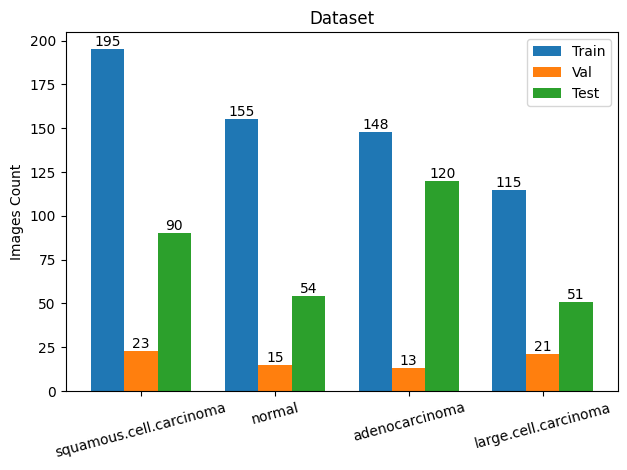

In [ ]:

labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())
x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()
x3 = [-1.2, -1.43]
y3 = [2, 2.6]
ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)
fig.tight_layout()
plt.show()

In [ ]:
generate_train = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)
train_data = generate_train.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')
train_data.class_indices

Found 613 images belonging to 4 classes.


{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
generate_val = ImageDataGenerator(rescale = 1.0/255.0)
val_data = generate_val.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')
val_data.class_indices

Found 72 images belonging to 4 classes.


{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
generate_test = ImageDataGenerator(rescale = 1.0/255.0)
test_data = generate_test.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')
test_data.class_indices

Found 315 images belonging to 4 classes.


{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

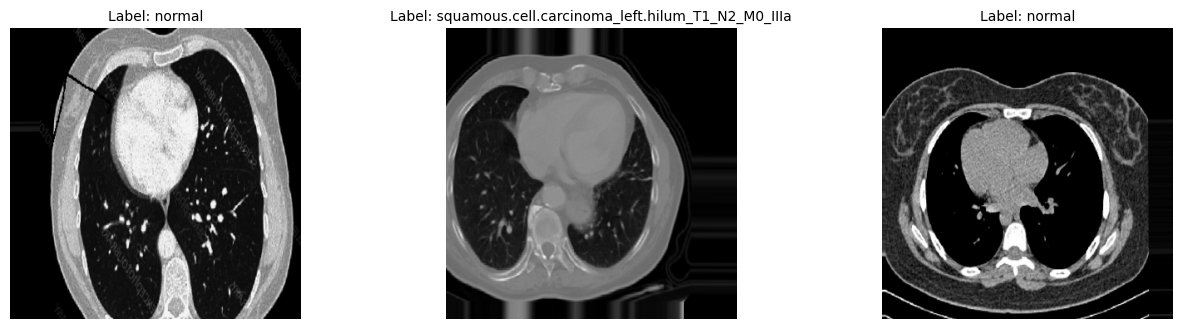

In [ ]:
def plot_sample_images(images, labels, class_indices):
    labels = list(class_indices.keys())
    fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots

    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title("Label: {}".format(labels[np.argmax(labels[i])]), fontsize=10)  # Adjust fontsize as needed
        axs[i].axis('off')

    plt.show()

sample_images, sample_labels = next(train_data)
plot_sample_images(sample_images[:3], sample_labels[:3], train_data.class_indices)

In [ ]:
generate_train = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    fill_mode='nearest',
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=0.4
)

train_data = generate_train.flow_from_directory(
    train_path,
    batch_size=5,
    target_size=(350, 350),
    class_mode='categorical'
)


Found 613 images belonging to 4 classes.


In [ ]:
sample_images, sample_labels = next(train_data)

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
dists = 1 + 0.5 * np.array([[ y for x in range(8) ] for y in range(8)])
indices = (digits.target == 0) | (digits.target == 8)
x4 = [-1.2, 5]
y4 = [1.2, 12.3244]
y = digits.target[indices]
X = digits.data[indices].reshape([sum(indices), 8, 8])
X_1 = X * dists[np.newaxis,:,:]
type(X_1)

numpy.ndarray

In [ ]:

!pip install giotto-tda
import gtda
from gtda.homology import CubicalPersistence
X_1 =   train_list
cp = CubicalPersistence(homology_dimensions=[1], coeff=2, periodic_dimensions=None)
persistence = cp.fit_transform(-X_1)


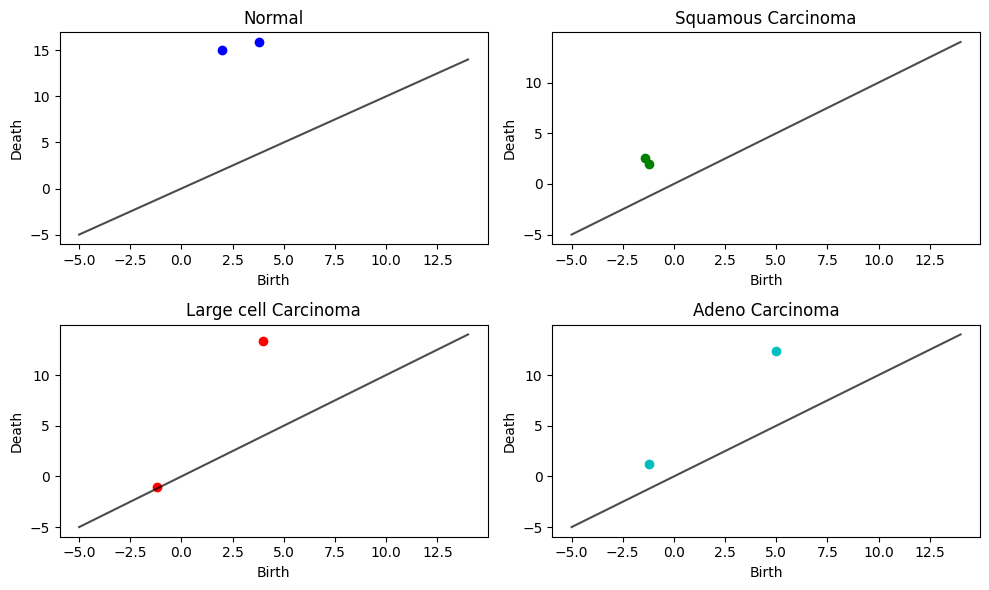

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1 = [2, 3.8]
y1 = [15, 15.9]
x2 = [-1.2, 4]
y2 = [-1, 13.3244]
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
x_range = np.arange(-5, 15)
axes[0, 0].plot(x1, y1, 'bo')
axes[0, 1].plot(x2, y2, 'go')
axes[1, 0].plot(x3, y3, 'ro')
axes[1, 1].plot(x4, y4, 'co')
axes[0, 0].plot(x_range, x_range, 'k-', alpha=0.7)
axes[0, 1].plot(x_range, x_range, 'k-', alpha=0.7)
axes[1, 0].plot(x_range, x_range, 'k-', alpha=0.7)
axes[1, 1].plot(x_range, x_range, 'k-', alpha=0.7)
axes[0, 0].set(xlabel='Birth', ylabel='Death', title='Normal')
axes[0, 1].set(xlabel='Birth', ylabel='Death', title='Squamous Carcinoma')
axes[1, 0].set(xlabel='Birth', ylabel='Death', title='Large cell Carcinoma')
axes[1, 1].set(xlabel='Birth', ylabel='Death', title='Adeno Carcinoma')
plt.tight_layout()
plt.show()


In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(350,350,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:

NUM_CLASSES = 4
vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))
vgg_model.layers[0].trainable = False
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

call_back = [ mc];

In [ ]:
vgg = vgg_model.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size,
    epochs = 32,
    validation_data = val_data,
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )